# <font style="color:rgb(50,120,229)">Bitwise Operations </font>

So far we have had a look at some basic arithmetic operations. Now it's time to study the last set of operations in this module - bitwise operations. We will focus on the following bitwise operations.

**AND operation**: [**`cv2.bitwise_and`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

**OR operation**: [**`cv2.bitwise_or`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)

**NOT operation**: [**`cv2.bitwise_not`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)

**XOR operation**: [**`cv2.bitwise_xor`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)


Among all the bitwise operations, the AND operation is the most used.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
```python
dst	=	cv2.bitwise_XXX(	src1, src2[, dst[, mask]]	)
```

XXX stands for the operation

**Parameters**

- **`src1`**	- first input.
- **`src2`**	- second input.
- **`dst`**	- output array that has the same size and type as the input array.
- **`mask`** - optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed. The operation is applied only on those pixels of the input images where the mask is non-zero.

**The operation is applied elementwise between two matrices. The two inputs should be of the same size for this operation.**

Here's a cheat sheet on the input and output table for these bitwise operations.

| **Operation** | **Input-1** | **Input-2** | **Output** |
| --- | --- | --- | --- |
| **AND** | 0 | 0 | 0 |
| **AND** | 0 | 1 | 0 |
| **AND** | 1 | 0 | 0 |
| **AND** | 1 | 1 | 1 |
| **OR** | 0 | 0 | 0 |
| **OR** | 0 | 1 | 1 |
| **OR** | 1 | 0 | 1 |
| **OR** | 1 | 1 | 1 |
| **NOT** | 0 | NA | 1 |
| **NOT** | 1 | NA | 0 |
| **XOR** | 0 | 0 | 0 |
| **XOR** | 0 | 1 | 1 |
| **XOR** | 1 | 0 | 1 |
| **XOR** | 1 | 1 | 0 |

They will be highly useful while extracting any part of the image (as we will see in coming modules), defining and working with non-rectangular ROI etc.
0 = false, 1 = true
The XOR logical operation, exclusive or, takes two boolean operands and returns true if, and only if, the operands are different. Conversely, it returns false if the two operands have the same value.

## <font style="color:rgb(50,120,229)">Example</font>

To understand the usage of these functions, let us take the sunglasses filter example from the previous section and use bitwise operations to arrive at the same result.

We will follow the same steps, but instead of arithmetic operations like MULTIPLY & ADD  , we will use bitwise operations like AND, NOT and OR.

In [23]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import matplotlib

### <font style="color:rgb(8,133,37)">Load the images </font>

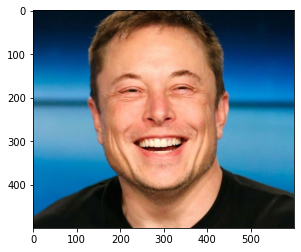

In [25]:
# Load the Face Images
faceImagePath = 'data/images/musk.jpg'
faceImage = cv2.imread(faceImagePath)
plt.imshow(faceImage[...,::-1])

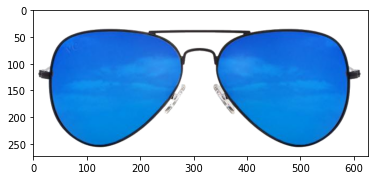

In [26]:
#make a copy
faceWithGlassesBitwise = faceImage.copy()
# Load the sunglasses image with alpha channel
glassesimagePath = "data/images/sunglass.png"
glassesPNG = cv2.imread(glassesimagePath,-1)
glassesRGB = cv2.cvtColor(glassesPNG,cv2.COLOR_BGR2RGB)
plt.imshow(glassesRGB)

In [27]:
# Resize the image to fit over the eye region
glassesPNG = cv2.resize(glassesPNG,(300,100))
print("glass image Dimensions = {}".format(glassesPNG.shape))

glass image Dimensions = (100, 300, 4)


In [28]:
print('Face image Dimensions = {}'.format(faceImage.shape))

Face image Dimensions = (500, 600, 3)


In [29]:
# Separate the Color and Alpha channels
glassesBGR = glassesPNG[:,:,0:3]
glassesMask1 = glassesPNG[:,:,3]

Text(0.5, 1.0, 'Alpha channel')

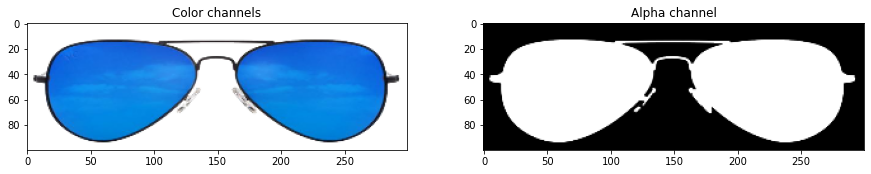

In [30]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassesBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(glassesMask1, cmap='gray');plt.title('Alpha channel')

### <font style="color:rgb(8,133,37)">Get the masked outputs </font>

In [31]:
# Get the eye region from the face image
eyeROI = faceWithGlassesBitwise[150:250,140:440]
print("eyeROI dimension = {}".format(eyeROI.shape) )
# Make the Dimensions of the mask same as the input image
# Since Face Image is a 3-Channel image, we create a 3 Channel image for the mask
glassesMask = cv2.merge((glassesMask1, glassesMask1, glassesMask1))
print("glassesMask dimension = {}".format(glassesMask.shape))

eyeROI dimension = (100, 300, 3)
glassesMask dimension = (100, 300, 3)


In [32]:
# Use the mask to create the masked eye region
# eyeROI 和 glassesMask的dimension大小要相同才可以
eye = cv2.bitwise_and(eyeROI, cv2.bitwise_not(glassesMask))

In [33]:
# Use the mask to create the masked sunglasses region
sunglasses = cv2.bitwise_and(glassesBGR,glassesMask)

In [34]:
# combine the sunglasses in the Eye Region to get the augmented image
eyeRoiFinal = cv2.bitwise_or(eye, sunglasses)
#notice bitwise_or is used as combining method without image overlapping

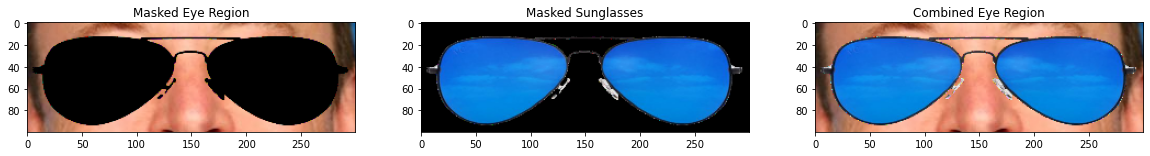

In [35]:
# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
plt.subplot(132);plt.imshow(sunglasses[:,:,::-1]);plt.title("Masked Sunglasses");
plt.subplot(133);plt.imshow(np.uint8(eyeRoiFinal)[:,:,::-1]);plt.title("Combined Eye Region");

### <font style="color:rgb(8,133,37)">Get the final Result</font>

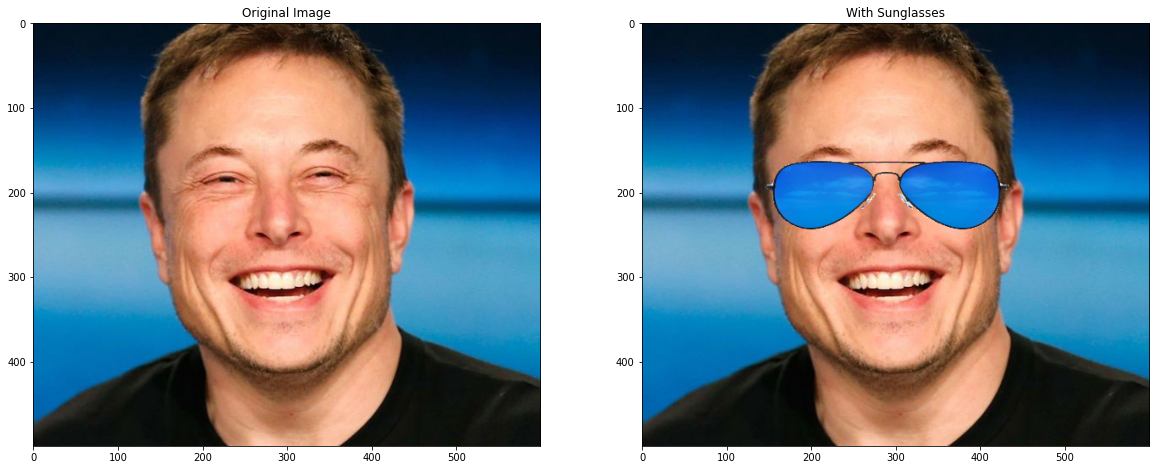

In [36]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesBitwise[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");